In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
path_to_file = '/Volumes/SandiskSSD/Developer/AI_Document/PythonProject/FinalDataset3.csv'
customer_data = pd.read_csv(path_to_file)

In [4]:
customer_data

,Age,Is_student,Spending_Willing,Spending_Average,Gender_Female,Gender_Male,occupation_full_time_employed,occupation_looking_for_a_job,occupation_other,occupation_part_time_employed,...,Marketing_Channel_Social_Media_Posts,Marketing_Channel_Social_Media_Ads,Marketing_Channel_Influencer_Reviews,Marketing_Channel_Livestream,Marketing_Channel_Short_Videos,Frustration_Issues_Complicated_Returns,Frustration_Issues_Expectations_Mismatch,Frustration_Issues_Hidden_Fees,Frustration_Issues_Poor_Quality,Frustration_Issues_Long_Delivery
0,25.5,1,750000.0,350000.0,0,1,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
1,25.5,1,100000.0,100000.0,0,1,0,0,0,1,...,1,1,0,0,1,0,1,1,1,1
2,25.5,1,350000.0,350000.0,0,1,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
3,25.5,0,1000000.0,1000000.0,1,0,0,1,0,0,...,1,0,0,1,1,0,1,0,0,1
4,25.5,1,750000.0,750000.0,0,1,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,25.5,0,1000000.0,350000.0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,1,1,0
179,17.5,1,350000.0,100000.0,0,1,0,0,1,0,...,1,0,0,0,0,1,1,0,1,0
180,25.5,0,1000000.0,750000.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
181,25.5,0,350000.0,350000.0,0,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [6]:
customer_data['Age'].value_counts()

Age
25.5    137
17.5     43
45.5      2
35.5      1
Name: count, dtype: int64

In [7]:
original_data = customer_data.copy()

In [8]:
from sklearn.preprocessing import StandardScaler

features = ['Age', 'Spending_Willing', 'Spending_Average']
customer_data_numeric = customer_data.loc[:, features].values
customer_data_numeric = StandardScaler().fit_transform(customer_data_numeric)
customer_data_numeric = pd.DataFrame(customer_data_numeric, columns=features)

In [9]:
customer_data_numeric

,Age,Spending_Willing,Spending_Average
0,0.385417,0.543497,-0.381288
1,0.385417,-1.418536,-1.134805
2,0.385417,-0.663908,-0.381288
3,0.385417,1.298125,1.577857
4,0.385417,0.543497,0.824339
...,...,...,...
178,0.385417,1.298125,-0.381288
179,-1.533801,-0.663908,-1.134805
180,0.385417,1.298125,0.824339
181,0.385417,-0.663908,-0.381288


In [10]:
customer_data_dummies = pd.get_dummies(customer_data.drop(columns=features))

In [11]:
customer_data_dummies

,Is_student,Gender_Female,Gender_Male,occupation_full_time_employed,occupation_looking_for_a_job,occupation_other,occupation_part_time_employed,Shop_Frequency_2-3_times_a_month,Shop_Frequency_2-3_times_a_week,Shop_Frequency_daily_almost_daily,...,Marketing_Channel_Social_Media_Posts,Marketing_Channel_Social_Media_Ads,Marketing_Channel_Influencer_Reviews,Marketing_Channel_Livestream,Marketing_Channel_Short_Videos,Frustration_Issues_Complicated_Returns,Frustration_Issues_Expectations_Mismatch,Frustration_Issues_Hidden_Fees,Frustration_Issues_Poor_Quality,Frustration_Issues_Long_Delivery
0,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
1,1,0,1,0,0,0,1,0,0,0,...,1,1,0,0,1,0,1,1,1,1
2,1,0,1,0,1,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
4,1,0,1,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0,0,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,1,0
179,1,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,1,1,0,1,0
180,0,1,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,1,0
181,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [12]:
from sklearn.cluster import AgglomerativeClustering
customer_data = pd.concat([customer_data_numeric, customer_data_dummies], axis=1)
model = AgglomerativeClustering(n_clusters=5, linkage='ward')
customer_data['Agglomerative_Cluster'] = model.fit_predict(customer_data)

In [13]:
customer_data

,Age,Spending_Willing,Spending_Average,Is_student,Gender_Female,Gender_Male,occupation_full_time_employed,occupation_looking_for_a_job,occupation_other,occupation_part_time_employed,...,Marketing_Channel_Social_Media_Ads,Marketing_Channel_Influencer_Reviews,Marketing_Channel_Livestream,Marketing_Channel_Short_Videos,Frustration_Issues_Complicated_Returns,Frustration_Issues_Expectations_Mismatch,Frustration_Issues_Hidden_Fees,Frustration_Issues_Poor_Quality,Frustration_Issues_Long_Delivery,Agglomerative_Cluster
0,0.385417,0.543497,-0.381288,1,0,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,2
1,0.385417,-1.418536,-1.134805,1,0,1,0,0,0,1,...,1,0,0,1,0,1,1,1,1,2
2,0.385417,-0.663908,-0.381288,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,2
3,0.385417,1.298125,1.577857,0,1,0,0,1,0,0,...,0,0,1,1,0,1,0,0,1,4
4,0.385417,0.543497,0.824339,1,0,1,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.385417,1.298125,-0.381288,0,0,1,1,0,0,0,...,1,0,0,0,0,1,1,1,0,2
179,-1.533801,-0.663908,-1.134805,1,0,1,0,0,1,0,...,0,0,0,0,1,1,0,1,0,1
180,0.385417,1.298125,0.824339,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
181,0.385417,-0.663908,-0.381288,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,1,0,3


In [14]:
customer_data['Agglomerative_Cluster']

0      2
1      2
2      2
3      4
4      0
      ..
178    2
179    1
180    0
181    3
182    2
Name: Agglomerative_Cluster, Length: 183, dtype: int64

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [16]:
n_clus = [2, 3, 4, 5, 6, 7, 8, 9, 10]
compare = []
for n in n_clus:
    model = AgglomerativeClustering(n_clusters=n, linkage='ward')
    cluster_labels = model.fit_predict(customer_data)
    sil_score = silhouette_score(customer_data, cluster_labels)
    cal_score = calinski_harabasz_score(customer_data, cluster_labels)
    db_score = davies_bouldin_score(customer_data, cluster_labels)
    compare.append([n, sil_score, cal_score, db_score])
compare_df = pd.DataFrame(compare, columns = ['n_clusters', 'Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'])

In [17]:
compare_df

,n_clusters,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
0,2,0.094202,17.058726,2.723799
1,3,0.117830,17.511898,2.379577
2,4,0.091451,15.475637,2.636877
3,5,0.081274,13.797041,2.758236
4,6,0.085207,12.049308,2.489211
5,7,0.075221,10.877427,2.690609
6,8,0.069036,9.912374,2.898845
7,9,0.065460,9.118438,2.957879
8,10,0.062478,8.504963,3.020122


# Choose the most important features

In [18]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 94 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Age                                               183 non-null    float64
 1   Spending_Willing                                  183 non-null    float64
 2   Spending_Average                                  183 non-null    float64
 3   Is_student                                        183 non-null    int64  
 4   Gender_Female                                     183 non-null    int64  
 5   Gender_Male                                       183 non-null    int64  
 6   occupation_full_time_employed                     183 non-null    int64  
 7   occupation_looking_for_a_job                      183 non-null    int64  
 8   occupation_other                                  183 non-null    int64  
 9   occupation_part_time_

In [19]:
frustration_issues = customer_data.iloc[:, 88:93].values
frustration_issues = pd.DataFrame(frustration_issues, columns=['Complicated Returns', 'Expectations Mismatch', 'Hidden Fees', 'Poor Quality', 'Long Delivery'])
# frustration_issues

In [20]:
product_categories = customer_data.iloc[:, 40:51].values
product_categories = pd.DataFrame(product_categories, columns=['Beauty', 'Book', 'Electronics', 'Online Education', 'Home Appliances', 'Software', 'Other Categories', 'Entertainment', 'Vehicles', 'Fashion', 'Food'])
# product_categories

In [21]:
main_platforms = customer_data.iloc[:, 75:81].values
main_platforms = pd.DataFrame(main_platforms, columns=['Facebook', 'Lazada', 'Other Platforms', 'Shopee', 'Instagram', 'Tiktok'])
# main_platforms

In [22]:
shop_frequency = customer_data.iloc[:, 10:15].values
shop_frequency = pd.DataFrame(shop_frequency, columns=['Shop_Frequency_2-3_times_a_month', 'Shop_Frequency_2-3_times_a_week', 'Shop_Frequency_daily_almost_daily', 'Shop_Frequency_once_a_month_or_less', 'Shop_Frequency_once_a_week'])
# shop_frequency

In [23]:
discount_importance = customer_data.iloc[:, 35:40].values
discount_importance = pd.DataFrame(discount_importance,
                              columns=['Discount_Importance_extremely_important', 'Discount_Importance_moderately_important',
                                       'Discount_Importance_not_important', 'Discount_Importance_slightly_important',
                                       'Discount_Importance_very_important'])
# discount_importance

In [24]:
switch_platform = customer_data.iloc[:, 15:20].values
switch_platform = pd.DataFrame(switch_platform,
                              columns=['Switch_Platform_Likelihood_certainly', 'Switch_Platform_Likelihood_likely',
                                       'Switch_Platform_Likelihood_posibily_occasionally', 'Switch_Platform_Likelihood_unlikely',
                                       'Switch_Platform_Likelihood_very_unlikely'])
# switch_platform

In [25]:
compare_frequency = customer_data.iloc[:, 20:25].values
compare_frequency = pd.DataFrame(compare_frequency,
                              columns=['Compare_Frequency_Always', 'Compare_Frequency_Never',
                                       'Compare_Frequency_Often', 'Compare_Frequency_Rarely',
                                       'Compare_Frequency_Sometimes'])
# compare_frequency

In [26]:
review_importance = customer_data.iloc[:, 25:35].values
review_importance = pd.DataFrame(review_importance,
                              columns = [
    "Review_Importance_extremely_important",
    "Review_Importance_moderately_important",
    "Review_Importance_not_important",
    "Review_Importance_slightly_important",
    "Review_Importance_very_important",
    "Review_Read_Frequency_Always",
    "Review_Read_Frequency_Never",
    "Review_Read_Frequency_Often",
    "Review_Read_Frequency_Rarely",
    "Review_Read_Frequency_Sometimes",
])
# review_importance

In [27]:
mixed_review_actions = customer_data.iloc[:, 69:75].values
mixed_review_actions = pd.DataFrame(
    mixed_review_actions,
    columns=[
        'Mixed_Review_Action_Avoid_Buying',
        'Mixed_Review_Action_Read_More_Detail',
        'Mixed_Review_Action_Buy_If_Price_Good',
        'Mixed_Review_Action_Look_Alternative',
        'Mixed_Review_Action_No_Effect',
        'Mixed_Review_Action_Other'
    ]
)

# Choose the best number of clusters

In [ ]:
customer_data = customer_data.drop('Agglomerative_Cluster', axis=1)

In [55]:
curated_features = ['Age', 'Spending_Willing','Spending_Average']
customer_data_curated_features = pd.concat([customer_data.loc[:, curated_features], shop_frequency, discount_importance, switch_platform, compare_frequency, review_importance, mixed_review_actions], axis=1)
# customer_data_curated_features = customer_data.loc[:, curated_features]
customer_data_curated_features

,Age,Spending_Willing,Spending_Average,Shop_Frequency_2-3_times_a_month,Shop_Frequency_2-3_times_a_week,Shop_Frequency_daily_almost_daily,Shop_Frequency_once_a_month_or_less,Shop_Frequency_once_a_week,Discount_Importance_extremely_important,Discount_Importance_moderately_important,...,Review_Read_Frequency_Never,Review_Read_Frequency_Often,Review_Read_Frequency_Rarely,Review_Read_Frequency_Sometimes,Mixed_Review_Action_Avoid_Buying,Mixed_Review_Action_Read_More_Detail,Mixed_Review_Action_Buy_If_Price_Good,Mixed_Review_Action_Look_Alternative,Mixed_Review_Action_No_Effect,Mixed_Review_Action_Other
0,0.385417,0.543497,-0.381288,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,0.385417,-1.418536,-1.134805,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.385417,-0.663908,-0.381288,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0.385417,1.298125,1.577857,0,0,0,0,1,1,0,...,0,0,0,0,0,1,1,1,0,0
4,0.385417,0.543497,0.824339,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.385417,1.298125,-0.381288,1,0,0,0,0,0,1,...,0,0,1,0,0,1,1,1,0,0
179,-1.533801,-0.663908,-1.134805,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
180,0.385417,1.298125,0.824339,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
181,0.385417,-0.663908,-0.381288,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [56]:
n_clus = [2, 3, 4, 5, 6, 7, 8, 9, 10]
compare = []
for n in n_clus:
    model = AgglomerativeClustering(n_clusters=n, linkage='ward')
    cluster_labels = model.fit_predict(customer_data_numeric)
    sil_score = silhouette_score(customer_data_numeric, cluster_labels)
    cal_score = calinski_harabasz_score(customer_data_numeric, cluster_labels)
    db_score = davies_bouldin_score(customer_data_numeric, cluster_labels)
    compare.append([n, sil_score, cal_score, db_score])
compare_df = pd.DataFrame(compare, columns = ['n_clusters', 'Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'])

In [57]:
compare_df

,n_clusters,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
0,2,0.455445,145.926844,0.919085
1,3,0.480859,133.874269,0.781635
2,4,0.531339,143.605780,0.685665
3,5,0.585120,172.062590,0.636225
4,6,0.617298,253.199366,0.577866
5,7,0.639184,267.812193,0.594997
6,8,0.641705,278.048070,0.591451
7,9,0.646607,289.527553,0.579363
8,10,0.662937,293.272155,0.513731


In [58]:
model = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels = model.fit_predict(customer_data_curated_features)
cluster_labels

array([1, 0, 0, 1, 1, 3, 0, 1, 1, 1, 0, 1, 0, 0, 4, 1, 1, 0, 1, 1, 1, 4,
       0, 1, 1, 1, 0, 0, 0, 0, 2, 4, 4, 2, 2, 0, 2, 2, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 2, 0, 1, 0,
       0, 1, 2, 0, 1, 4, 0, 0, 0, 1, 1, 0, 0, 2, 4, 0, 1, 1, 0, 0, 1, 0,
       2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 4,
       0, 4, 0, 1, 4, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 4, 1,
       0, 0, 4, 0, 1, 1, 0, 0, 4, 0, 0, 0, 2, 0, 2, 0, 0, 0, 4, 1, 1, 1,
       3, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2,
       0, 1, 1, 2, 1, 0, 1])

In [59]:
df = pd.DataFrame(cluster_labels)
df.value_counts()

0
0    74
1    67
2    27
4    13
3     2
Name: count, dtype: int64

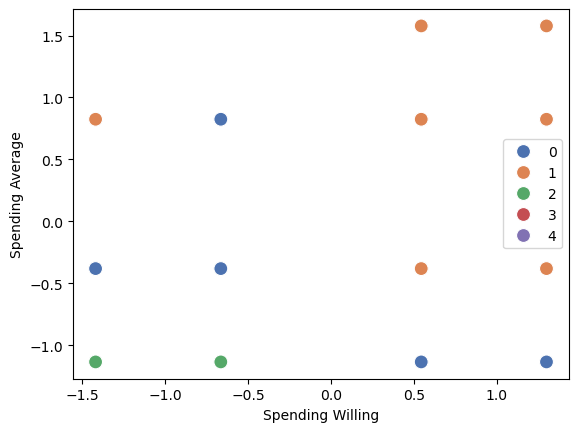

In [48]:
from seaborn import scatterplot
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.markersize'] = 10

scatterplot(x=customer_data_numeric['Spending_Willing'],y=customer_data_numeric['Spending_Average'], hue=cluster_labels, palette="deep")
plt.xlabel('Spending Willing')
plt.ylabel('Spending Average')
plt.show()

In [60]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

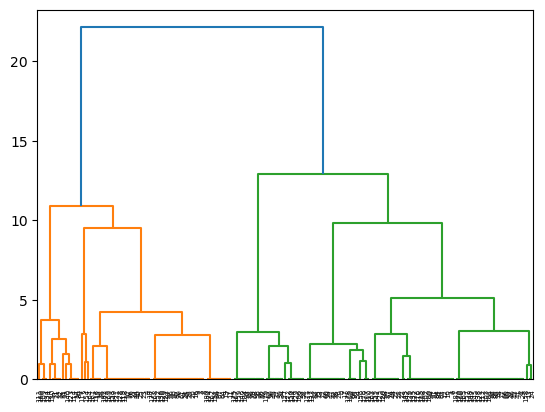

In [61]:
z = hierarchy.linkage(customer_data_numeric, 'ward')
hierarchy.dendrogram(z)
plt.show()

# Gower Distance

In [62]:
import gower
curated_features = ['Age', 'Spending_Willing','Spending_Average']
# curated_data = pd.concat([original_data.loc[:, curated_features], main_platforms, product_categories, frustration_issues], axis=1)
curated_data = pd.concat([customer_data.loc[:, curated_features], shop_frequency, discount_importance, switch_platform, compare_frequency, review_importance, mixed_review_actions], axis=1)
gower_matrix = gower.gower_matrix(curated_data)

In [63]:
gower_matrix

array([[0.        , 0.2820513 , 0.21652421, ..., 0.3005698 , 0.37037036,
        0.21652421],
       [0.2820513 , 0.        , 0.27065527, ..., 0.32621083, 0.21937323,
        0.34472933],
       [0.21652421, 0.27065527, 0.        , ..., 0.36324787, 0.35897437,
        0.22792023],
       ...,
       [0.3005698 , 0.32621083, 0.36324787, ..., 0.        , 0.31196582,
        0.28917378],
       [0.37037036, 0.21937323, 0.35897437, ..., 0.31196582, 0.        ,
        0.33048433],
       [0.21652421, 0.34472933, 0.22792023, ..., 0.28917378, 0.33048433,
        0.        ]], shape=(183, 183), dtype=float32)

In [64]:
curated_data

,Age,Spending_Willing,Spending_Average,Shop_Frequency_2-3_times_a_month,Shop_Frequency_2-3_times_a_week,Shop_Frequency_daily_almost_daily,Shop_Frequency_once_a_month_or_less,Shop_Frequency_once_a_week,Discount_Importance_extremely_important,Discount_Importance_moderately_important,...,Review_Read_Frequency_Never,Review_Read_Frequency_Often,Review_Read_Frequency_Rarely,Review_Read_Frequency_Sometimes,Mixed_Review_Action_Avoid_Buying,Mixed_Review_Action_Read_More_Detail,Mixed_Review_Action_Buy_If_Price_Good,Mixed_Review_Action_Look_Alternative,Mixed_Review_Action_No_Effect,Mixed_Review_Action_Other
0,0.385417,0.543497,-0.381288,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,0.385417,-1.418536,-1.134805,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.385417,-0.663908,-0.381288,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0.385417,1.298125,1.577857,0,0,0,0,1,1,0,...,0,0,0,0,0,1,1,1,0,0
4,0.385417,0.543497,0.824339,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.385417,1.298125,-0.381288,1,0,0,0,0,0,1,...,0,0,1,0,0,1,1,1,0,0
179,-1.533801,-0.663908,-1.134805,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
180,0.385417,1.298125,0.824339,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
181,0.385417,-0.663908,-0.381288,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [67]:
agg = AgglomerativeClustering(
    n_clusters=4,
    metric="precomputed",   # or affinity="precomputed" on older sklearn
    linkage="average"       # 'ward' is NOT allowed with precomputed
)
labels = agg.fit_predict(gower_matrix)
labels

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [68]:
df = pd.DataFrame(labels)
df.value_counts()

0
0    175
1      4
2      2
3      2
Name: count, dtype: int64

In [69]:
n_clus = [2, 3, 4, 5, 6, 7, 8, 9, 10]
compare = []
for n in n_clus:
    model = AgglomerativeClustering(n_clusters=n, linkage='average', metric="precomputed")
    cluster_labels = model.fit_predict(gower_matrix)
    sil_score = silhouette_score(gower_matrix, cluster_labels, metric="precomputed")
    compare.append([n, sil_score])
compare_df = pd.DataFrame(compare, columns = ['n_clusters', 'Silhouette Score'])

In [70]:
compare_df

,n_clusters,Silhouette Score
0,2,0.178908
1,3,0.147089
2,4,0.110893
3,5,0.086247
4,6,0.075284
5,7,0.066910
6,8,0.063413
7,9,0.089451
8,10,0.078644


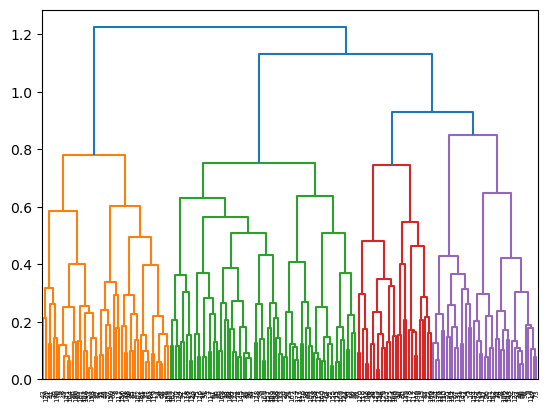

In [71]:
from scipy.spatial.distance import squareform

# gower_matrix is full n x n symmetric matrix
y = squareform(gower_matrix)     # condensed form required by linkage

Z = hierarchy.linkage(y, method='ward')  # distances already precomputed
hierarchy.dendrogram(Z)
plt.show()

# Use Boxplot to mine the meaning of the clusters

In [72]:
from seaborn import boxenplot, boxplot
import matplotlib.pyplot as plt

In [73]:
curated_data['Cluster'] = labels
curated_data

,Age,Spending_Willing,Spending_Average,Shop_Frequency_2-3_times_a_month,Shop_Frequency_2-3_times_a_week,Shop_Frequency_daily_almost_daily,Shop_Frequency_once_a_month_or_less,Shop_Frequency_once_a_week,Discount_Importance_extremely_important,Discount_Importance_moderately_important,...,Review_Read_Frequency_Often,Review_Read_Frequency_Rarely,Review_Read_Frequency_Sometimes,Mixed_Review_Action_Avoid_Buying,Mixed_Review_Action_Read_More_Detail,Mixed_Review_Action_Buy_If_Price_Good,Mixed_Review_Action_Look_Alternative,Mixed_Review_Action_No_Effect,Mixed_Review_Action_Other,Cluster
0,0.385417,0.543497,-0.381288,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
1,0.385417,-1.418536,-1.134805,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.385417,-0.663908,-0.381288,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0.385417,1.298125,1.577857,0,0,0,0,1,1,0,...,0,0,0,0,1,1,1,0,0,0
4,0.385417,0.543497,0.824339,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.385417,1.298125,-0.381288,1,0,0,0,0,0,1,...,0,1,0,0,1,1,1,0,0,0
179,-1.533801,-0.663908,-1.134805,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
180,0.385417,1.298125,0.824339,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
181,0.385417,-0.663908,-0.381288,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


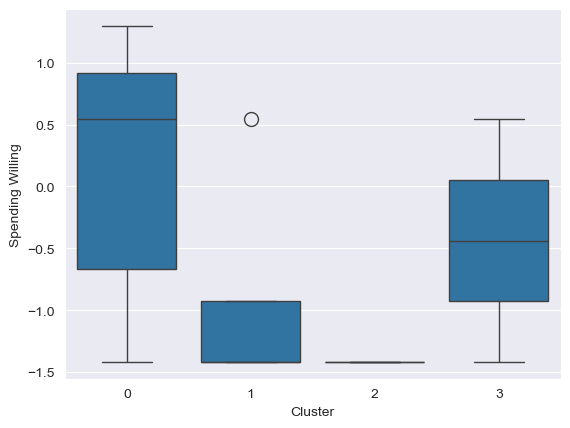

In [46]:
boxplot(data = curated_data, x='Cluster', y='Spending_Willing')
plt.ylabel('Spending Willing')
plt.xlabel('Cluster')
plt.show()

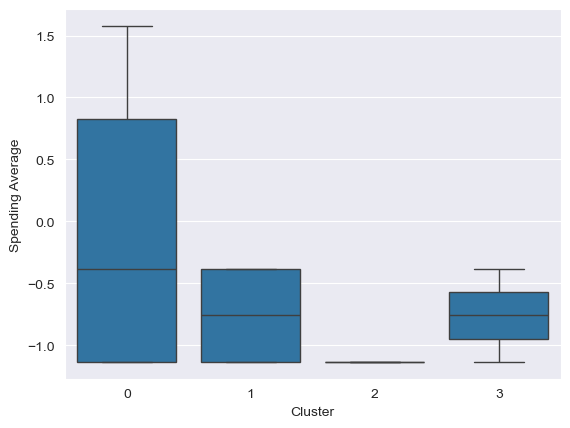

In [47]:
boxplot(data = curated_data, x='Cluster', y='Spending_Average')
plt.ylabel('Spending Average')
plt.xlabel('Cluster')
plt.show()

In [ ]:
boxplot(data = curated_data, x='Cluster', y='Tiktok')
plt.ylabel('Platform used')
plt.xlabel('Cluster')
plt.show()

In [104]:
customer_data

,Age,Spending_Willing,Spending_Average,Is_student,Gender_Female,Gender_Male,occupation_full_time_employed,occupation_looking_for_a_job,occupation_other,occupation_part_time_employed,...,Marketing_Channel_Social_Media_Posts,Marketing_Channel_Social_Media_Ads,Marketing_Channel_Influencer_Reviews,Marketing_Channel_Livestream,Marketing_Channel_Short_Videos,Frustration_Issues_Complicated_Returns,Frustration_Issues_Expectations_Mismatch,Frustration_Issues_Hidden_Fees,Frustration_Issues_Poor_Quality,Frustration_Issues_Long_Delivery
0,0.385417,0.543497,-0.381288,1,0,1,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
1,0.385417,-1.418536,-1.134805,1,0,1,0,0,0,1,...,1,1,0,0,1,0,1,1,1,1
2,0.385417,-0.663908,-0.381288,1,0,1,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
3,0.385417,1.298125,1.577857,0,1,0,0,1,0,0,...,1,0,0,1,1,0,1,0,0,1
4,0.385417,0.543497,0.824339,1,0,1,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.385417,1.298125,-0.381288,0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,1,1,0
179,-1.533801,-0.663908,-1.134805,1,0,1,0,0,1,0,...,1,0,0,0,0,1,1,0,1,0
180,0.385417,1.298125,0.824339,0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
181,0.385417,-0.663908,-0.381288,0,0,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0


# PCA

In [74]:
# customer_data_numeric = customer_data_numeric.drop('Age', axis=1)
customer_data_numeric

,Age,Spending_Willing,Spending_Average
0,0.385417,0.543497,-0.381288
1,0.385417,-1.418536,-1.134805
2,0.385417,-0.663908,-0.381288
3,0.385417,1.298125,1.577857
4,0.385417,0.543497,0.824339
...,...,...,...
178,0.385417,1.298125,-0.381288
179,-1.533801,-0.663908,-1.134805
180,0.385417,1.298125,0.824339
181,0.385417,-0.663908,-0.381288


In [75]:
from sklearn.decomposition import PCA
pca_num = PCA(n_components=None, random_state=0)
X_num_pca_full = pca_num.fit_transform(customer_data_numeric)
cum_var = pca_num.explained_variance_ratio_
for i, v in enumerate(cum_var, start=1):
    print(f'PC{i}: variance = {v:.3f}')

# Example: keep first 1–2 PCs
X_num_pca = X_num_pca_full[:, :2]   # shape (n_samples, 2)

PC1: variance = 0.623
PC2: variance = 0.295
PC3: variance = 0.081


In [76]:
print("Explained variance ratio (per component):", pca_num.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca_num.explained_variance_ratio_))
print("Principal component loadings (rows = PCs, cols = original features):")
print(pd.DataFrame(pca_num.components_, columns=customer_data_numeric.columns))

Explained variance ratio (per component): [0.62318526 0.29548819 0.08132655]
Cumulative explained variance: [0.62318526 0.91867345 1.        ]
Principal component loadings (rows = PCs, cols = original features):
        Age  Spending_Willing  Spending_Average
0  0.340082          0.666594          0.663322
1  0.940260         -0.229022         -0.251915
2 -0.016010          0.709367         -0.704658


# MCA

In [78]:
categorical_features = pd.concat([shop_frequency, discount_importance, switch_platform, compare_frequency, review_importance, mixed_review_actions], axis=1)
categorical_features

,Shop_Frequency_2-3_times_a_month,Shop_Frequency_2-3_times_a_week,Shop_Frequency_daily_almost_daily,Shop_Frequency_once_a_month_or_less,Shop_Frequency_once_a_week,Discount_Importance_extremely_important,Discount_Importance_moderately_important,Discount_Importance_not_important,Discount_Importance_slightly_important,Discount_Importance_very_important,...,Review_Read_Frequency_Never,Review_Read_Frequency_Often,Review_Read_Frequency_Rarely,Review_Read_Frequency_Sometimes,Mixed_Review_Action_Avoid_Buying,Mixed_Review_Action_Read_More_Detail,Mixed_Review_Action_Buy_If_Price_Good,Mixed_Review_Action_Look_Alternative,Mixed_Review_Action_No_Effect,Mixed_Review_Action_Other
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,1,1,0,0
179,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
180,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
181,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [79]:
import prince

X_cat_mca = categorical_features.astype('category')   # your dummy / categorical block

mca = prince.MCA(
    n_components=36,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='sklearn',      # <- important: 'sklearn', 'scipy', or 'fbpca'
    random_state=42
)

mca = mca.fit(X_cat_mca)
X_cat_mca_full = mca.transform(X_cat_mca)
X_cat_mca_full

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.156881,-0.460452,-0.008133,-0.000365,0.107411,-0.047240,0.091876,0.029688,-0.185814,0.123278,...,0.018893,-0.018912,-0.105485,0.066588,-0.985054,-0.026843,0.022112,0.005352,-0.013736,-0.030981
1,-0.306009,0.086665,-0.051811,0.235235,0.095981,0.269285,0.165753,-0.046771,0.181407,-0.040797,...,0.037142,0.071271,-0.060115,0.023153,-0.985054,-0.026843,0.022112,0.005352,-0.013736,-0.030981
2,0.385185,-0.147992,0.189826,0.421517,-0.318762,0.182301,0.226071,0.233684,0.114242,0.068168,...,-0.208656,0.079569,0.058682,-0.099364,-0.985054,-0.026843,0.022112,0.005352,-0.013736,-0.030981
3,-0.548908,0.213694,0.062121,-0.405261,-0.207301,-0.099383,0.120783,0.176370,-0.137135,-0.097880,...,0.056420,0.011961,0.094241,-0.000679,-0.985054,-0.026843,0.022112,0.005352,-0.013736,-0.030981
4,-0.157454,-0.436011,-0.174253,-0.281699,0.184991,0.037299,0.340233,0.079926,0.063345,0.013764,...,0.007089,-0.002005,-0.020818,-0.022249,-0.985054,-0.026843,0.022112,0.005352,-0.013736,-0.030981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.391179,-0.109503,-0.198198,0.293256,-0.470168,0.117719,0.239135,0.280475,-0.132585,-0.092665,...,-0.196090,0.118402,0.026912,0.012659,-0.985054,-0.026843,0.022112,0.005352,-0.013736,-0.030981
179,0.343054,-0.357796,0.230075,-0.047459,-0.273253,-0.164635,-0.017857,-0.211346,-0.147704,-0.014093,...,0.026227,-0.075842,-0.139312,-0.048008,-0.985054,-0.026843,0.022112,0.005352,-0.013736,-0.030981
180,-0.091130,0.137386,0.052543,-0.550379,-0.015731,-0.171466,0.042361,0.019974,-0.219931,-0.155013,...,0.089824,0.089740,0.136585,0.067321,-0.985054,-0.026843,0.022112,0.005352,-0.013736,-0.030981
181,-0.193515,0.429949,0.355954,0.150619,-0.054321,0.286537,-0.166106,-0.129846,-0.106558,0.000956,...,0.085282,-0.209990,-0.205562,0.036478,-0.985054,-0.026843,0.022112,0.005352,-0.013736,-0.030981


In [80]:
mca

,n_components,36
,n_iter,5
,copy,True
,check_input,True
,random_state,42
,engine,'sklearn'
,one_hot,True
,one_hot_prefix_sep,'__'
,one_hot_columns_to_drop,None
,correction,None


In [81]:
print("Feature names after MCA:", mca.get_feature_names_out)
print("Explained inertia ratio (per component):", mca.percentage_of_variance_)
print("Cumulative explained inertia:", np.cumsum(mca.percentage_of_variance_))
print("Eigenvalues:", mca.eigenvalues_)
print("Contributions: ", mca.column_contributions_)

Feature names after MCA: <bound method MCA.get_feature_names_out of MCA(n_components=36, n_iter=5, random_state=42)>
Explained inertia ratio (per component): [9.28944338e+00 7.09572621e+00 6.19930925e+00 5.34127350e+00
 5.17667212e+00 4.85273362e+00 4.63947895e+00 4.53028987e+00
 4.38984647e+00 4.27438976e+00 3.63458238e+00 3.57563538e+00
 3.26724859e+00 3.13375741e+00 3.09116012e+00 2.78870823e+00
 2.58099867e+00 2.53680658e+00 2.42171452e+00 2.19640754e+00
 2.07789343e+00 2.00957247e+00 1.89169646e+00 1.68506711e+00
 1.65014711e+00 1.35596259e+00 1.29986730e+00 1.17442062e+00
 1.06123908e+00 7.77951301e-01 2.63959066e-29 2.70265651e-31
 9.14498036e-32 9.14498036e-32 9.14498036e-32 9.14498036e-32]
Cumulative explained inertia: [  9.28944338  16.38516958  22.58447884  27.92575233  33.10242445
  37.95515808  42.59463703  47.1249269   51.51477337  55.78916313
  59.42374551  62.99938089  66.26662948  69.40038689  72.49154701
  75.28025523  77.86125391  80.39806048  82.81977501  85.0161825

In [82]:
# for i in range (len(mca.percentage_of_variance_)):
#     v = mca.percentage_of_variance_[i]
#     print(f'MCA Component {i+1}: inertia = {v:.3f}')

for i in range (len(mca.percentage_of_variance_)):
   comp_top = mca.column_contributions_[i].sort_values(ascending=False).head(9)
   print(f'MCA Component {i+1} - Top contributing variables:')
   print(comp_top)

MCA Component 1 - Top contributing variables:
Review_Importance_slightly_important__1     0.073131
Review_Read_Frequency_Always__0             0.070892
Review_Read_Frequency_Always__1             0.067121
Review_Importance_extremely_important__1    0.064200
Discount_Importance_not_important__1        0.063901
Switch_Platform_Likelihood_certainly__1     0.058264
Compare_Frequency_Always__1                 0.051455
Mixed_Review_Action_No_Effect__1            0.042113
Review_Read_Frequency_Rarely__1             0.039069
Name: 0, dtype: float64
MCA Component 2 - Top contributing variables:
Review_Read_Frequency_Often__1                 0.075228
Switch_Platform_Likelihood_very_unlikely__1    0.052807
Mixed_Review_Action_Read_More_Detail__0        0.052276
Discount_Importance_not_important__1           0.045459
Switch_Platform_Likelihood_likely__1           0.044797
Shop_Frequency_once_a_month_or_less__1         0.044421
Review_Importance_not_important__1             0.035398
Discount_Import

In [83]:
X_cat_mca_reduced = X_cat_mca_full.iloc[:, :9]

# Combine PCA and MCA features

In [84]:
print("Numerical PCA shape:", X_num_pca.shape)
print("Categorical MCA shape:", X_cat_mca_reduced.shape)

Numerical PCA shape: (183, 2)
Categorical MCA shape: (183, 9)


In [85]:
print("Numerical PCA sample:\n", X_num_pca[:5, :])
print("Categorical MCA sample:\n", X_cat_mca_reduced.head())

Numerical PCA sample:
 [[ 0.24044859  0.3339712 ]
 [-1.56725579  0.97314145]
 [-0.56440049  0.61049314]
 [ 2.04302329 -0.33239246]
 [ 1.04016799  0.03025585]]
Categorical MCA sample:
           0         1         2         3         4         5         6  \
0  0.156881 -0.460452 -0.008133 -0.000365  0.107411 -0.047240  0.091876   
1 -0.306009  0.086665 -0.051811  0.235235  0.095981  0.269285  0.165753   
2  0.385185 -0.147992  0.189826  0.421517 -0.318762  0.182301  0.226071   
3 -0.548908  0.213694  0.062121 -0.405261 -0.207301 -0.099383  0.120783   
4 -0.157454 -0.436011 -0.174253 -0.281699  0.184991  0.037299  0.340233   

          7         8  
0  0.029688 -0.185814  
1 -0.046771  0.181407  
2  0.233684  0.114242  
3  0.176370 -0.137135  
4  0.079926  0.063345  


In [86]:
X_final = np.hstack([X_num_pca, X_cat_mca_reduced])
X_final

array([[ 0.24044859,  0.3339712 ,  0.15688131, ...,  0.09187551,
         0.02968842, -0.1858142 ],
       [-1.56725579,  0.97314145, -0.30600895, ...,  0.16575317,
        -0.04677092,  0.18140665],
       [-0.56440049,  0.61049314,  0.38518495, ...,  0.22607111,
         0.2336836 ,  0.11424236],
       ...,
       [ 1.54319866, -0.14257036, -0.09112998, ...,  0.04236066,
         0.01997442, -0.2199308 ],
       [-0.56440049,  0.61049314, -0.19351492, ..., -0.16610566,
        -0.12984595, -0.10655773],
       [ 1.04016799,  0.03025585,  0.27230149, ..., -0.35138637,
        -0.25716561,  0.08416044]], shape=(183, 11))

In [87]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

compare = []

for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(X_final)
    sil_score = silhouette_score(X_final, labels, metric='euclidean')
    cal_score = calinski_harabasz_score(X_final, labels)
    db_score = davies_bouldin_score(X_final, labels)
    compare.append([k, sil_score, cal_score, db_score])
    # print(f'k={k}, silhouette={sil_score:.3f}')

compare_df = pd.DataFrame(compare, columns = ['n_clusters', 'Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'])

print(compare_df)

   n_clusters  Silhouette Score  Calinski-Harabasz Score  Davies-Bouldin Score
0           2          0.380388               138.502596              1.035739
1           3          0.367531               110.808016              0.895688
2           4          0.388686               110.025675              0.912379
3           5          0.407871               118.994712              0.845576
4           6          0.342161               123.446719              0.935914
5           7          0.295992               115.562763              1.118787
6           8          0.260473               107.419548              1.260661
7           9          0.250578               100.003303              1.234958
8          10          0.234401                94.111258              1.311244


In [88]:
n_clus = [2, 3, 4, 5, 6, 7, 8, 9, 10]
compare = []
for n in n_clus:
    model = AgglomerativeClustering(n_clusters=n, linkage='ward')
    cluster_labels = model.fit_predict(customer_data_curated_features)
    sil_score = silhouette_score(customer_data_curated_features, cluster_labels)
    cal_score = calinski_harabasz_score(customer_data_curated_features, cluster_labels)
    db_score = davies_bouldin_score(customer_data_curated_features, cluster_labels)
    compare.append([n, sil_score, cal_score, db_score])
compare_df = pd.DataFrame(compare, columns = ['n_clusters', 'Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'])
print(compare_df)

   n_clusters  Silhouette Score  Calinski-Harabasz Score  Davies-Bouldin Score
0           2          0.149617                36.497084              2.185107
1           3          0.109117                26.046551              2.244489
2           4          0.118000                21.374465              1.863382
3           5          0.112264                18.596729              2.004536
4           6          0.101431                16.842704              2.040336
5           7          0.087865                15.627562              2.209858
6           8          0.072694                14.474016              2.349650
7           9          0.072458                13.613341              2.343080
8          10          0.075358                12.803444              2.335670


In [89]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = model.fit_predict(X_final)
labels

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3,
       1, 0, 1, 0, 0, 1, 1, 1, 2, 3, 3, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 2, 2, 0, 2, 3, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 0, 1,
       1, 0, 2, 0, 0, 3, 0, 0, 1, 0, 0, 1, 1, 2, 3, 1, 0, 0, 1, 1, 0, 1,
       2, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 3,
       0, 3, 1, 0, 3, 1, 1, 0, 0, 0, 1, 1, 0, 3, 3, 1, 0, 2, 0, 2, 3, 0,
       1, 0, 3, 1, 0, 0, 1, 1, 3, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       0, 1, 0, 1, 0, 2, 3, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2,
       1, 0, 0, 2, 0, 1, 0])

In [90]:
curated_features = ['Age', 'Spending_Willing','Spending_Average']
curated_data = pd.concat([original_data.loc[:, curated_features], shop_frequency, discount_importance, switch_platform, compare_frequency, review_importance, mixed_review_actions], axis=1)

curated_data['Cluster'] = labels
curated_data

,Age,Spending_Willing,Spending_Average,Shop_Frequency_2-3_times_a_month,Shop_Frequency_2-3_times_a_week,Shop_Frequency_daily_almost_daily,Shop_Frequency_once_a_month_or_less,Shop_Frequency_once_a_week,Discount_Importance_extremely_important,Discount_Importance_moderately_important,...,Review_Read_Frequency_Often,Review_Read_Frequency_Rarely,Review_Read_Frequency_Sometimes,Mixed_Review_Action_Avoid_Buying,Mixed_Review_Action_Read_More_Detail,Mixed_Review_Action_Buy_If_Price_Good,Mixed_Review_Action_Look_Alternative,Mixed_Review_Action_No_Effect,Mixed_Review_Action_Other,Cluster
0,25.5,750000.0,350000.0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
1,25.5,100000.0,100000.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,25.5,350000.0,350000.0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,25.5,1000000.0,1000000.0,0,0,0,0,1,1,0,...,0,0,0,0,1,1,1,0,0,0
4,25.5,750000.0,750000.0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,25.5,1000000.0,350000.0,1,0,0,0,0,0,1,...,0,1,0,0,1,1,1,0,0,0
179,17.5,350000.0,100000.0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,2
180,25.5,1000000.0,750000.0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
181,25.5,350000.0,350000.0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [91]:
counts = curated_data['Cluster'].value_counts(sort=False).sort_index()
print(counts)

Cluster
0    79
1    61
2    27
3    16
Name: count, dtype: int64


In [92]:
num_cols = ['Age', 'Spending_Willing', 'Spending_Average']

num_summary = curated_data.groupby('Cluster')[num_cols].mean().round(0)
print(num_summary)

          Age  Spending_Willing  Spending_Average
Cluster                                          
0        26.0          865190.0          714557.0
1        26.0          272951.0          236066.0
2        18.0          229630.0          174074.0
3        18.0          818750.0          728125.0


In [93]:
dummy_cols = [c for c in curated_data.columns
              if c not in num_cols + ['Cluster']]

dummy_summary = curated_data.groupby('Cluster')[dummy_cols].mean().round(2)
dummy_summary

,Shop_Frequency_2-3_times_a_month,Shop_Frequency_2-3_times_a_week,Shop_Frequency_daily_almost_daily,Shop_Frequency_once_a_month_or_less,Shop_Frequency_once_a_week,Discount_Importance_extremely_important,Discount_Importance_moderately_important,Discount_Importance_not_important,Discount_Importance_slightly_important,Discount_Importance_very_important,...,Review_Read_Frequency_Never,Review_Read_Frequency_Often,Review_Read_Frequency_Rarely,Review_Read_Frequency_Sometimes,Mixed_Review_Action_Avoid_Buying,Mixed_Review_Action_Read_More_Detail,Mixed_Review_Action_Buy_If_Price_Good,Mixed_Review_Action_Look_Alternative,Mixed_Review_Action_No_Effect,Mixed_Review_Action_Other
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.48,0.11,0.03,0.09,0.29,0.25,0.25,0.03,0.13,0.34,...,0.00,0.29,0.06,0.15,0.08,0.85,0.34,0.46,0.04,0.01
1,0.34,0.08,0.03,0.46,0.08,0.21,0.25,0.10,0.13,0.31,...,0.07,0.31,0.11,0.03,0.15,0.66,0.31,0.33,0.07,0.02
2,0.48,0.07,0.00,0.37,0.07,0.19,0.19,0.00,0.07,0.56,...,0.00,0.26,0.00,0.04,0.19,0.70,0.26,0.56,0.04,0.04
3,0.44,0.12,0.25,0.00,0.19,0.25,0.44,0.00,0.12,0.19,...,0.00,0.38,0.06,0.12,0.06,0.69,0.31,0.50,0.12,0.06


In [94]:
curated_data

,Age,Spending_Willing,Spending_Average,Shop_Frequency_2-3_times_a_month,Shop_Frequency_2-3_times_a_week,Shop_Frequency_daily_almost_daily,Shop_Frequency_once_a_month_or_less,Shop_Frequency_once_a_week,Discount_Importance_extremely_important,Discount_Importance_moderately_important,...,Review_Read_Frequency_Often,Review_Read_Frequency_Rarely,Review_Read_Frequency_Sometimes,Mixed_Review_Action_Avoid_Buying,Mixed_Review_Action_Read_More_Detail,Mixed_Review_Action_Buy_If_Price_Good,Mixed_Review_Action_Look_Alternative,Mixed_Review_Action_No_Effect,Mixed_Review_Action_Other,Cluster
0,25.5,750000.0,350000.0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
1,25.5,100000.0,100000.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,25.5,350000.0,350000.0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,25.5,1000000.0,1000000.0,0,0,0,0,1,1,0,...,0,0,0,0,1,1,1,0,0,0
4,25.5,750000.0,750000.0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,25.5,1000000.0,350000.0,1,0,0,0,0,0,1,...,0,1,0,0,1,1,1,0,0,0
179,17.5,350000.0,100000.0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,2
180,25.5,1000000.0,750000.0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
181,25.5,350000.0,350000.0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [95]:
overall = curated_data[dummy_cols].mean()
print(overall)

Shop_Frequency_2-3_times_a_month                    0.431694
Shop_Frequency_2-3_times_a_week                     0.098361
Shop_Frequency_daily_almost_daily                   0.043716
Shop_Frequency_once_a_month_or_less                 0.245902
Shop_Frequency_once_a_week                          0.180328
Discount_Importance_extremely_important             0.229508
Discount_Importance_moderately_important            0.256831
Discount_Importance_not_important                   0.043716
Discount_Importance_slightly_important              0.120219
Discount_Importance_very_important                  0.349727
Switch_Platform_Likelihood_certainly                0.169399
Switch_Platform_Likelihood_likely                   0.267760
Switch_Platform_Likelihood_posibily_occasionally    0.256831
Switch_Platform_Likelihood_unlikely                 0.185792
Switch_Platform_Likelihood_very_unlikely            0.120219
Compare_Frequency_Always                            0.229508
Compare_Frequency_Never 

In [96]:
diff = dummy_summary.subtract(overall, axis=1)
# large positive values = over-represented in that cluster
diff

,Shop_Frequency_2-3_times_a_month,Shop_Frequency_2-3_times_a_week,Shop_Frequency_daily_almost_daily,Shop_Frequency_once_a_month_or_less,Shop_Frequency_once_a_week,Discount_Importance_extremely_important,Discount_Importance_moderately_important,Discount_Importance_not_important,Discount_Importance_slightly_important,Discount_Importance_very_important,...,Review_Read_Frequency_Never,Review_Read_Frequency_Often,Review_Read_Frequency_Rarely,Review_Read_Frequency_Sometimes,Mixed_Review_Action_Avoid_Buying,Mixed_Review_Action_Read_More_Detail,Mixed_Review_Action_Buy_If_Price_Good,Mixed_Review_Action_Look_Alternative,Mixed_Review_Action_No_Effect,Mixed_Review_Action_Other
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.048306,0.011639,-0.013716,-0.155902,0.109672,0.020492,-0.006831,-0.013716,0.009781,-0.009727,...,-0.021858,-0.010546,-0.011038,0.057104,-0.034754,0.101366,0.02306,0.028306,-0.014645,-0.011858
1,-0.091694,-0.018361,-0.013716,0.214098,-0.100328,-0.019508,-0.006831,0.056284,0.009781,-0.039727,...,0.048142,0.009454,0.038962,-0.062896,0.035246,-0.088634,-0.00694,-0.101694,0.015355,-0.001858
2,0.048306,-0.028361,-0.043716,0.124098,-0.110328,-0.039508,-0.066831,-0.043716,-0.050219,0.210273,...,-0.021858,-0.040546,-0.071038,-0.052896,0.075246,-0.048634,-0.05694,0.128306,-0.014645,0.018142
3,0.008306,0.021639,0.206284,-0.245902,0.009672,0.020492,0.183169,-0.043716,-0.000219,-0.159727,...,-0.021858,0.079454,-0.011038,0.027104,-0.054754,-0.058634,-0.00694,0.068306,0.065355,0.038142


In [ ]:
cluster0_top = diff.loc[0].sort_values(ascending=False).head(5)
print(cluster0_top)

In [97]:
import pandas as pd

# 1. Define your column groups (rename duplicated "Other" first!)
platform_cols = ['Facebook', 'Lazada', 'Shopee', 'Instagram', 'Tiktok', 'Other Platforms']
category_cols = ['Beauty', 'Book', 'Electronics', 'Online Education',
                 'Home Appliances', 'Software', 'Entertainment', 'Vehicles', 'Fashion', 'Food', 'Other Categories']
issue_cols = ['Complicated Returns', 'Expectations Mismatch',
              'Hidden Fees', 'Poor Quality', 'Long Delivery']

shop_frequency = ['Shop_Frequency_2-3_times_a_month', 'Shop_Frequency_2-3_times_a_week',
                                       'Shop_Frequency_daily_almost_daily', 'Shop_Frequency_once_a_month_or_less',
                                       'Shop_Frequency_once_a_week']

discount_importance = ['Discount_Importance_extremely_important',
                                            'Discount_Importance_moderately_important',
                                            'Discount_Importance_not_important',
                                            'Discount_Importance_slightly_important',
                                            'Discount_Importance_very_important']

switch_platform = ['Switch_Platform_Likelihood_certainly', 'Switch_Platform_Likelihood_likely',
                                        'Switch_Platform_Likelihood_posibily_occasionally',
                                        'Switch_Platform_Likelihood_unlikely',
                                        'Switch_Platform_Likelihood_very_unlikely']

compare_frequency = ['Compare_Frequency_Always', 'Compare_Frequency_Never',
                                          'Compare_Frequency_Often', 'Compare_Frequency_Rarely',
                                          'Compare_Frequency_Sometimes']

review_importance = [
                                    "Review_Importance_extremely_important",
                                     "Review_Importance_moderately_important",
                                     "Review_Importance_not_important",
                                     "Review_Importance_slightly_important",
                                     "Review_Importance_very_important",
                                     "Review_Read_Frequency_Always",
                                     "Review_Read_Frequency_Never",
                                     "Review_Read_Frequency_Often",
                                     "Review_Read_Frequency_Rarely",
                                     "Review_Read_Frequency_Sometimes",
                                 ]

mixed_review_actions = [
        'Mixed_Review_Action_Avoid_Buying',
        'Mixed_Review_Action_Read_More_Detail',
        'Mixed_Review_Action_Buy_If_Price_Good',
        'Mixed_Review_Action_Look_Alternative',
        'Mixed_Review_Action_No_Effect',
        'Mixed_Review_Action_Other'
    ]


cluster_drivers = {}

for cl in dummy_summary.index:
    var_info = {}   # var_name -> {'value': float, 'sources': set([...])}

    # --- 1) Headline variables: all with mean > 0.5 in each group ---
    def add_from_group(cols, source_tag):
        for col in cols:
            val = dummy_summary.loc[cl, col]
            if val > 0.5:   # threshold
                if col not in var_info:
                    var_info[col] = {'value': val, 'sources': set()}
                var_info[col]['sources'].add(source_tag)

    add_from_group(shop_frequency, 'headline')
    add_from_group(discount_importance, 'headline')
    add_from_group(switch_platform, 'headline')
    add_from_group(compare_frequency, 'headline')
    add_from_group(review_importance, 'headline')
    add_from_group(mixed_review_actions, 'headline')

    # --- 2) Top 5 over-indexed variables (diff), but keep only those with value > 0.5 ---
    top_over = diff.loc[cl].sort_values(ascending=False).head(5)

    for var, _ in top_over.items():
        val = dummy_summary.loc[cl, var]   # proportion in this cluster
        if val > 0.3:                      # apply same threshold
            if var not in var_info:
                var_info[var] = {'value': val, 'sources': set()}
            var_info[var]['sources'].add('overindexed')

    # --- 3) Build list of strings: "Name (xx.xx)" + "(Overlapped)" if needed ---
    # sort by value descending
    entries = []
    for var, info in sorted(var_info.items(),
                            key=lambda x: x[1]['value'],
                            reverse=True):
        tag = ' (Overlapped)' if len(info['sources']) > 1 else ''
        entries.append(f"{var} ({info['value']:.2f}){tag}")

    cluster_drivers[cl] = entries

# 4) Optional: convert to DataFrame for nicer display
max_len = max(len(v) for v in cluster_drivers.values()) if cluster_drivers else 0

summary_df = pd.DataFrame(
    {
        f"Driver {i+1}": [
            cluster_drivers[cl][i] if i < len(cluster_drivers[cl]) else ''
            for cl in dummy_summary.index
        ]
        for i in range(max_len)
    },
    index=dummy_summary.index
)

summary_df

,Driver 1,Driver 2,Driver 3,Driver 4,Driver 5,Driver 6
Cluster,,,,,,
0,Mixed_Review_Action_Read_More_Detail (0.85) (O...,Review_Importance_very_important (0.49),Switch_Platform_Likelihood_likely (0.38),,,
1,Mixed_Review_Action_Read_More_Detail (0.66),Shop_Frequency_once_a_month_or_less (0.46),Switch_Platform_Likelihood_posibily_occasional...,,,
2,Review_Read_Frequency_Always (0.70) (Overlapped),Mixed_Review_Action_Read_More_Detail (0.70),Discount_Importance_very_important (0.56) (Ove...,Mixed_Review_Action_Look_Alternative (0.56) (O...,Review_Importance_extremely_important (0.52) (...,Shop_Frequency_once_a_month_or_less (0.37)
3,Mixed_Review_Action_Read_More_Detail (0.69),Discount_Importance_moderately_important (0.44),Switch_Platform_Likelihood_posibily_occasional...,Compare_Frequency_Rarely (0.31),,


In [99]:
full_summary = pd.concat([num_summary, summary_df], axis=1)
full_summary

,Age,Spending_Willing,Spending_Average,Driver 1,Driver 2,Driver 3,Driver 4,Driver 5,Driver 6
Cluster,,,,,,,,,
0,26.0,865190.0,714557.0,Mixed_Review_Action_Read_More_Detail (0.85) (O...,Review_Importance_very_important (0.49),Switch_Platform_Likelihood_likely (0.38),,,
1,26.0,272951.0,236066.0,Mixed_Review_Action_Read_More_Detail (0.66),Shop_Frequency_once_a_month_or_less (0.46),Switch_Platform_Likelihood_posibily_occasional...,,,
2,18.0,229630.0,174074.0,Review_Read_Frequency_Always (0.70) (Overlapped),Mixed_Review_Action_Read_More_Detail (0.70),Discount_Importance_very_important (0.56) (Ove...,Mixed_Review_Action_Look_Alternative (0.56) (O...,Review_Importance_extremely_important (0.52) (...,Shop_Frequency_once_a_month_or_less (0.37)
3,18.0,818750.0,728125.0,Mixed_Review_Action_Read_More_Detail (0.69),Discount_Importance_moderately_important (0.44),Switch_Platform_Likelihood_posibily_occasional...,Compare_Frequency_Rarely (0.31),,


In [100]:
print(full_summary)

          Age  Spending_Willing  Spending_Average  \
Cluster                                             
0        26.0          865190.0          714557.0   
1        26.0          272951.0          236066.0   
2        18.0          229630.0          174074.0   
3        18.0          818750.0          728125.0   

                                                  Driver 1  \
Cluster                                                      
0        Mixed_Review_Action_Read_More_Detail (0.85) (O...   
1              Mixed_Review_Action_Read_More_Detail (0.66)   
2         Review_Read_Frequency_Always (0.70) (Overlapped)   
3              Mixed_Review_Action_Read_More_Detail (0.69)   

                                                Driver 2  \
Cluster                                                    
0                Review_Importance_very_important (0.49)   
1             Shop_Frequency_once_a_month_or_less (0.46)   
2            Mixed_Review_Action_Read_More_Detail (0.70)   
3       

In [102]:
desired = [
    'Review_Read_Frequency_Always',
    'Discount_Importance_very_important',
]

num_cols = ['Age', 'Spending_Willing', 'Spending_Average']
dummy_cols = [c for c in desired]

missing = [c for c in dummy_cols if c not in customer_data_dummies.columns]
if missing:
    raise KeyError(f"Missing columns in `customer_data_dummies`: {missing}")

x = pd.concat([customer_data_numeric[num_cols], customer_data_dummies[dummy_cols]], axis=1)
x = x.to_numpy()
print("X_final shape:", x.shape)
x

X_final shape: (183, 5)


array([[ 0.38541678,  0.54349707, -0.38128789,  0.        ,  0.        ],
       [ 0.38541678, -1.41853559, -1.13480498,  1.        ,  1.        ],
       [ 0.38541678, -0.66390765, -0.38128789,  0.        ,  1.        ],
       [ 0.38541678,  1.29812501,  1.57785656,  1.        ,  0.        ],
       [ 0.38541678,  0.54349707,  0.82433947,  0.        ,  1.        ],
       [ 5.18346237,  0.54349707,  0.82433947,  0.        ,  0.        ],
       [ 0.38541678, -1.41853559, -1.13480498,  0.        ,  0.        ],
       [ 0.38541678,  1.29812501,  0.82433947,  1.        ,  0.        ],
       [ 0.38541678,  1.29812501,  1.57785656,  0.        ,  1.        ],
       [ 0.38541678,  1.29812501,  1.57785656,  1.        ,  1.        ],
       [ 0.38541678, -1.41853559, -1.13480498,  0.        ,  0.        ],
       [ 0.38541678,  1.29812501,  0.82433947,  1.        ,  1.        ],
       [ 0.38541678, -1.41853559, -1.13480498,  0.        ,  0.        ],
       [ 0.38541678, -1.41853559,  0.8

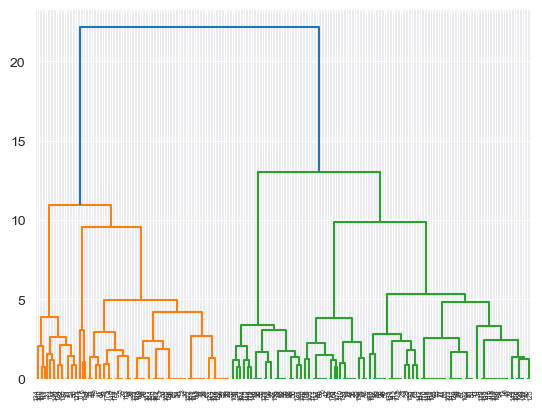

In [103]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
z = hierarchy.linkage(x, 'ward')
hierarchy.dendrogram(z)
plt.show()